# 4.10 Coding Etiquette and Excel Reporting (Part 3)

## Table of Contents

- (Continue..)Compare And identify customer profiles with regions and departments

- Department category expenditure aggregation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path
path = r'/Users/rusamijan/03-2023 Instacart Basket Analysis'

In [3]:
# import high_activity data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [4]:
#import departments data set 
df_depts = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [5]:
df.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_of_registration,number_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
5,3367565,1,6,2,7,19.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
7,3108588,1,8,1,14,14.0,196.0,2.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
8,2295261,1,9,1,16,0.0,196.0,4.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
9,2550362,1,10,4,8,30.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity


In [6]:
# Recreating income_category columns
df.loc[df['income']< 70000, 'income_category'] = 'Low'
df.loc[(df['income']>= 70000) & (df['income']< 100000), 'income_category'] = 'Middle-class'
df.loc[(df['income']>= 100000) & (df['income']< 130000), 'income_category'] = 'Upper-mid-class'
df.loc[df['income']>= 130000, 'income_category'] = 'High'

In [7]:
# Checking income_category values
df['income_category'].value_counts(dropna = False)

Low                8520533
Middle-class       8236629
High               7401414
Upper-mid-class    6805988
Name: income_category, dtype: int64

In [8]:
crosstab_income_region = pd.crosstab (df['region'],df['income_category'], dropna = False)

In [9]:
crosstab_income_region

income_category,High,Low,Middle-class,Upper-mid-class
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


Text(0.5, 0, 'Region')

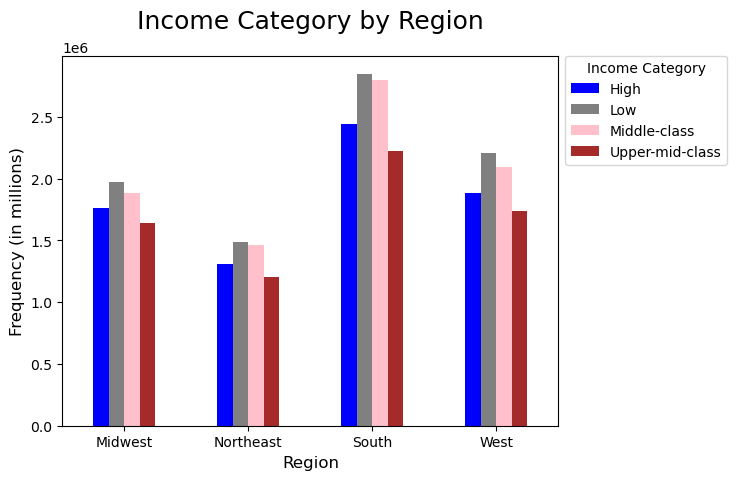

In [10]:
# Creating a bar chart of income by US regions
bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['blue', 'gray', 'pink', 'brown'])
# The default for bbox_to_anchor is (0,0,1,1), which is a bounding box over the complete axes. If a different bounding box is specified, is is usually sufficient to use the first two values, which give (x0, y0) of the bounding box.
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Income Category by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

Low-Income customers make up the Majority of Instacart customers by Region

In [11]:
# Recreating order_habit
order_habit = []

for value in df["order_hour_of_day"]:
  if value in [10,11,14,15,13,12,16,9]:
   order_habit.append("Stardard hours")
  elif value in [23,6,0,1,5,2,4,3]:
    order_habit.append("Early bird")
  else:
   order_habit.append("Night owl")

In [12]:
df['cust_ords_habit']= order_habit

In [13]:
# check added new columnn
df.shape

(30964564, 35)

In [14]:
# Creating cust_ords_habit and region connection
ct_ods_habit = pd.crosstab(df['region'], df['cust_ords_habit'], dropna = False)


In [15]:
ct_ods_habit

cust_ords_habit,Early bird,Night owl,Stardard hours
region,,,
Midwest,285815,2250470,4725228
Northeast,222249,1682688,3559748
South,414122,3190331,6706686
West,310712,2427321,5189194


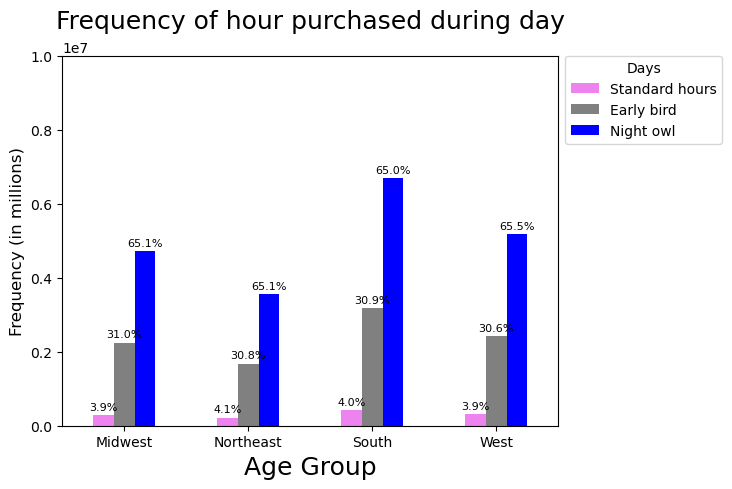

In [16]:
# Visualization of crosstab_age_day
bar_region_habit = ct_ods_habit.plot(kind = 'bar', rot = 0, color= ['violet', 'gray', 'blue'])
bar_region_habit.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Standard hours', 'Early bird', 'Night owl'])
plt.title('Frequency of hour purchased during day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 18)

# Annotating the bar chart
total = ct_ods_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_ods_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_region_habit.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_region_habit.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)

In [17]:
bar_region_habit.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_rgn_03.17.png'), bbox_inches='tight')

In [18]:
# Create crosstab by region with loyalty flag
ct_reg_loyf = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)

In [19]:
ct_reg_loyf

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


Text(0.5, 1.0, 'Loyal Customers by Region')

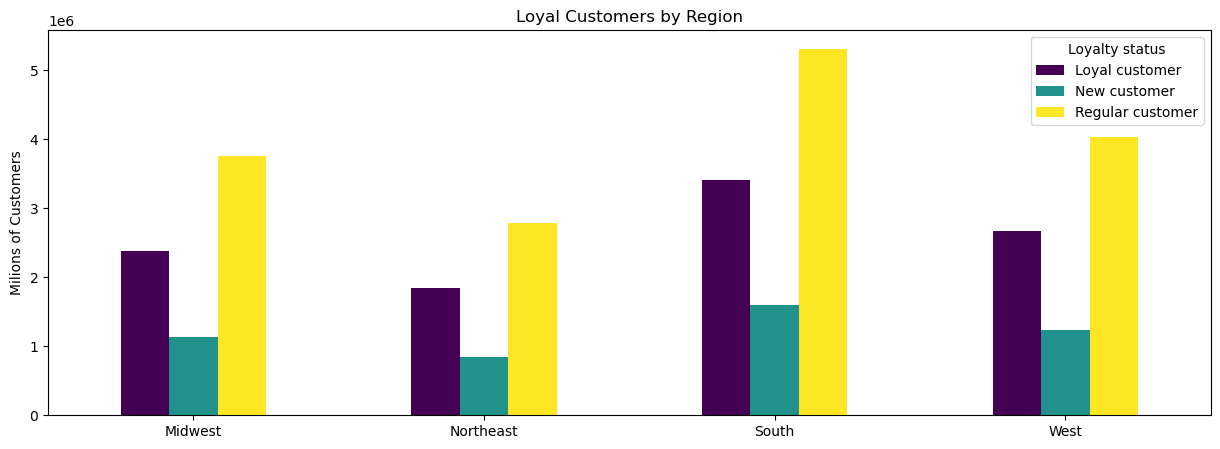

In [20]:
# Create barchart from crosstab
bar_loyalty_region = ct_reg_loyf.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='viridis').legend(title='Loyalty status', bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Milions of Customers')
plt.title ('Loyal Customers by Region')

In [21]:
#exporting 
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','loyalty_region_barchart_03.17.png'))

In [22]:
# creating a crosstab of region and spending-flag
bar_region_spdf = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [23]:
bar_region_spdf

spending_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


Text(0.5, 1.0, 'Spending by Region')

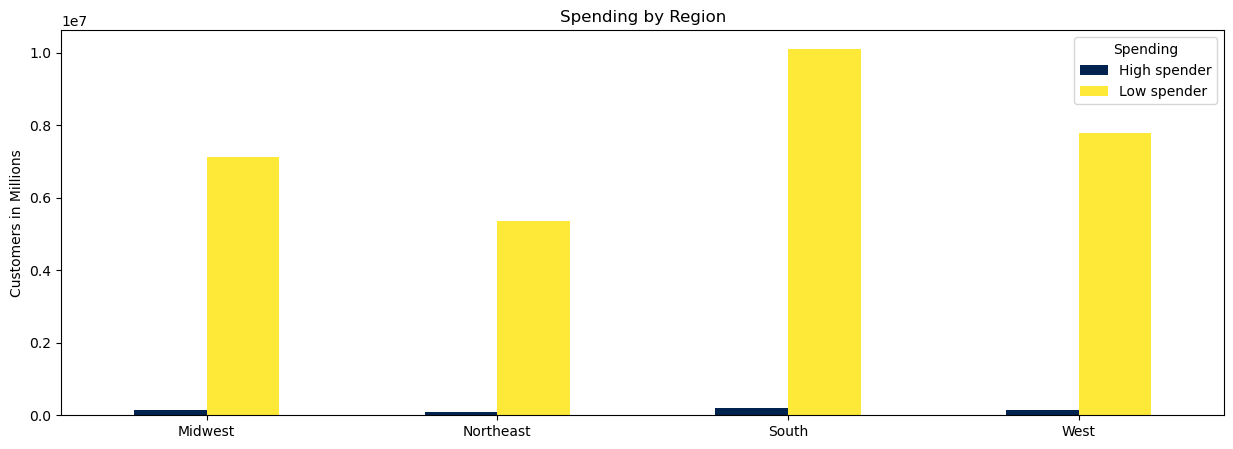

In [24]:
# Create barchart from crosstab
bar_spending_region = bar_region_spdf.plot.bar(rot=0, figsize=(15,5), colormap='cividis').legend(title='Spending')
plt.xlabel('')
plt.ylabel('Customers in Millions')
plt.title ('Spending by Region')

In [25]:
bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','spending_region_barchart_03.17.png'))

In [26]:
#create subset to make price_range
df_price_rag = df[:1000000]

In [27]:
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [28]:
df['price_range'] = df_price_rag.apply(price_label, axis=1)

In [29]:
df['price_range'].value_counts(dropna = False)

NaN                  29964564
Mid-range product      642525
Low-range product      346684
High range              10475
Not enough data           316
Name: price_range, dtype: int64

In [30]:
df_price_rag.loc[df_price_rag['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_price_rag.loc[(df_price_rag['prices'] <= 15) & (df_price_rag['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
df_price_rag.loc[df_price_rag['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [31]:
df_price_rag['price_range_loc'].value_counts(dropna = False)

Mid-range product     642525
Low-range product     346684
High-range product     10791
Name: price_range_loc, dtype: int64

Text(0.5, 1.0, 'Instacart Products Price Range')

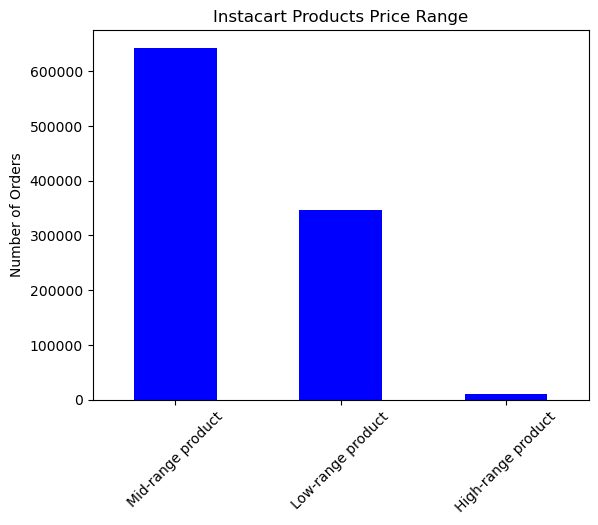

In [32]:
#creating a barchart with the price range of the products
bar_price_range =df_price_rag['price_range_loc'].value_counts().plot.bar(rot = 45, color = 'blue')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title ('Instacart Products Price Range')

In [33]:
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_price_range_barchart_03.17.png'))

In [34]:
df_depts.head(10)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [35]:
# Changing the column name from Unnamed: 0 to department_id
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [36]:
ct_dept_rprice = pd.crosstab(df['department_id'], df['price_range_loc'], dropna = False)

In [37]:
ct_dept_rprice

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,0,647617,0
2,0,15259,0
3,0,274986,0
4,0,2585708,547899
5,0,33046,0
6,0,73203,0
7,0,814697,42668
8,0,28165,0
9,0,284346,0


In [96]:
ct_dept_rprice_2 = pd.crosstab(df['department'], df['price_range_loc'], dropna = False)

In [97]:
ct_dept_rprice_2

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,0
babies,0,121484,0
bakery,0,274986,0
beverages,0,814697,42668
breakfast,0,209185,0
bulk,0,1181,0
canned goods,0,281711,0
dairy eggs,4877,1370908,34442
deli,0,299220,94869


Text(0.5, 1.0, 'Orders by Department & Price Range')

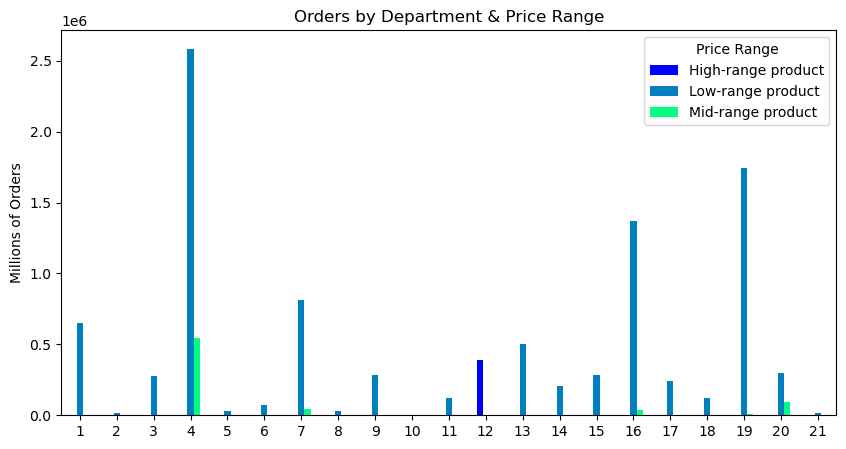

In [38]:
# Creating a bar chart crossing price range with department id 
bar_department_price_range = ct_dept_rprice.plot.bar(rot=0, figsize=(10,5), colormap='winter').legend(title='Price Range')
plt.xlabel('')
plt.ylabel('Millions of Orders')
plt.title ('Orders by Department & Price Range')

Text(0.5, 1.0, 'Orders by Department & Price Range')

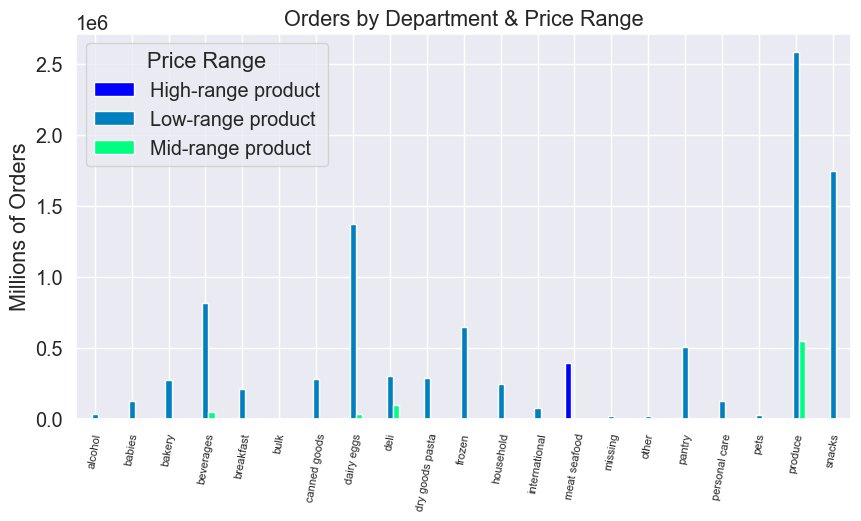

In [99]:
# Creating a bar chart crossing price range with department id 
bar_department_price_range_2 = ct_dept_rprice_2.plot.bar(rot=0, figsize=(10,5), colormap='winter').legend(title='Price Range')
plt.xlabel('')
plt.xticks(rotation=80, fontsize = 8)
plt.ylabel('Millions of Orders')
plt.title ('Orders by Department & Price Range')

In [39]:
# Export
bar_department_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_price_range_03.17.png'), bbox_inches = 'tight')

In [100]:
# Export
bar_department_price_range_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_price_range_2_03.17.png'), bbox_inches = 'tight')

In [40]:
ct_dept_loyf = pd.crosstab(df['department_id'], df['loyalty_flag'], dropna = False)

In [41]:
ct_dept_loyf

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,372271,1140000
2,10715,5839,17857
3,379873,172104,568851
4,3147376,1336604,4595293
5,38723,28629,77275
6,78394,43841,133756
7,855017,396649,1320235
8,25469,15880,51711
9,242580,144836,434720


Text(0.5, 1.0, 'Orders by Department & Price Range')

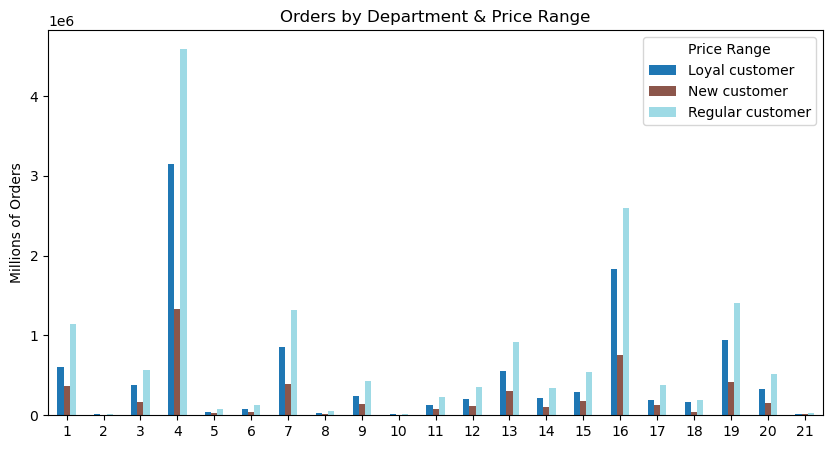

In [42]:
# Creating a bar chart crossing loyalty_flag with department id 
bar_department_loyalty_flag = ct_dept_loyf.plot.bar(rot=0, figsize=(10,5), colormap='tab20').legend(title='Price Range')
plt.xlabel('')
plt.ylabel('Millions of Orders')
plt.title ('Orders by Department & Price Range')

In [43]:
# Export
bar_department_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_price_range_03.17.png'), bbox_inches = 'tight')

In [44]:
ct_dept_loyf = pd.crosstab(df['department_id'], df['loyalty_flag'], dropna = False)

In [45]:
ct_dept_loyf 

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,372271,1140000
2,10715,5839,17857
3,379873,172104,568851
4,3147376,1336604,4595293
5,38723,28629,77275
6,78394,43841,133756
7,855017,396649,1320235
8,25469,15880,51711
9,242580,144836,434720


Text(0.5, 1.0, 'Orders by Department & Loyalty Status')

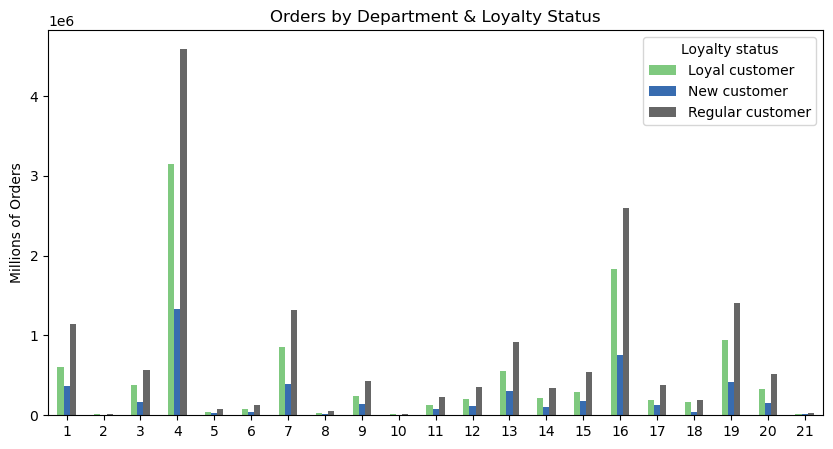

In [46]:
bar_department_loyalty = ct_dept_loyf.plot.bar(rot=0, figsize=(10,5), colormap='Accent').legend(title='Loyalty status')
plt.xlabel('')
plt.ylabel('Millions of Orders')
plt.title ('Orders by Department & Loyalty Status')

In [47]:
# Export
bar_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_loyalty_03.17.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Product Prices')

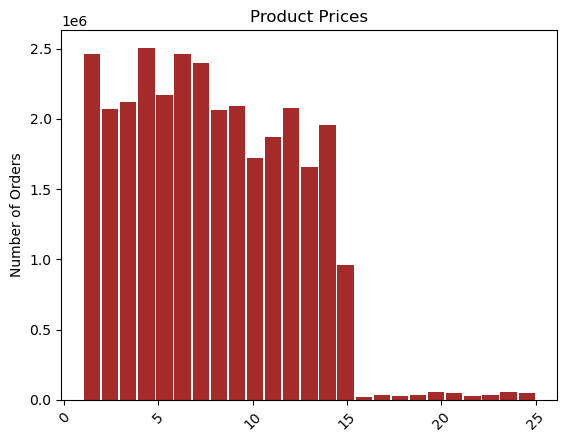

In [48]:
# Creating a histogram with product prices
hist_price_frequency =df['prices'].plot.hist(bins = 25,rot = 45, color = 'brown', rwidth = 0.9)
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title ('Product Prices')

In [49]:
# Export
hist_price_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','hist_prices_03.17.png'))

In [50]:
#creating a crosstab tho cross loyalty status and regularity of orders
ct_loyf_ord = pd.crosstab(df['days_since_prior_order'], df['loyalty_flag'], dropna = False)

Text(0.5, 1.0, 'Days Since Prior Order & Loyalty customer')

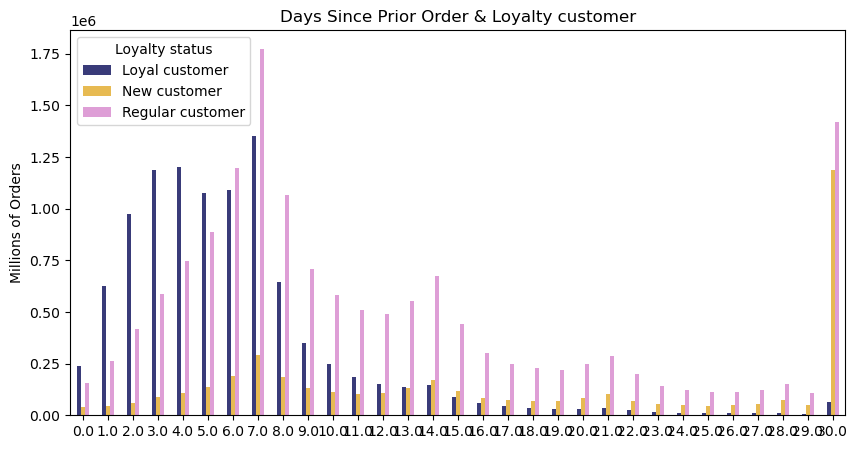

In [51]:
bar_reg_order_loyalty = ct_loyf_ord.plot.bar(rot=0, figsize=(10,5), colormap='tab20b').legend(title='Loyalty status')
plt.xlabel('')
plt.ylabel('Millions of Orders')
plt.title ('Days Since Prior Order & Loyalty customer')

In [52]:
# Export
bar_reg_order_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','day_prior_order_&_loyalty_03.17.png'), bbox_inches = 'tight')

## Department category expenditure aggregation

In [53]:
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [54]:
# Create dictionary 
dprt_map = dict(zip(df_depts["department_id"], df_depts["department"]))

In [55]:
df['department'] = df['department_id'].map(dprt_map)

In [56]:
df.shape

(30964564, 37)

In [57]:
# Distribution of 'department' values in 'df' dataframe
df['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [58]:
# Department category expenditure aggregation
df.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
department                           
alcohol           8.150699  1.0  15.0
babies            7.634399  1.0  15.0
bakery            7.857482  1.0  15.0
beverages         7.682556  1.0  15.0
breakfast         8.031647  1.0  14.9
bulk              8.346919  1.4  14.1
canned goods      7.546660  1.0  15.0
dairy eggs        8.336372  1.0  15.0
deli              7.783347  1.0  15.0
dry goods pasta   7.349370  1.0  15.0
frozen            7.733725  1.0  15.0
household         7.379951  1.0  15.0
international     7.678797  1.0  15.0
meat seafood     16.300034  8.0  25.0
missing           8.660655  1.0  15.0
other             6.961995  1.1  15.0
pantry            8.014482  1.0  20.0
personal care     7.998744  1.0  15.0
pets              7.887489  1.0  15.0
produce           7.980348  1.0  15.0
snacks            4.275555  1.6   7.0

In [59]:
# Recreating age categories
df.loc[(df['age'] >= 18) & (df['age'] < 40), 'age_category'] = 'Youth'
df.loc[(df['age'] >= 40) & (df['age'] < 65), 'age_category'] = 'Middle Aged'
df.loc[df['age'] >= 65, 'age_category'] = 'Senior'

In [60]:
# Checking age_category values
df['age_category'].value_counts()

Middle Aged    12103910
Youth          10665110
Senior          8195544
Name: age_category, dtype: int64

In [61]:
# Confirming the added column
df.shape

(30964564, 38)

In [62]:
# Age category usage frequency aggregation
df.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                          mean  min    max
age_category                              
Middle Aged           8.354216  1.0  145.0
Senior                8.307779  1.0   99.0
Youth                 8.415515  1.0  109.0

In [63]:
# Region expenditure aggregation
df.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792318  1.0  25.0
Northeast  7.781441  1.0  25.0
South      7.794439  1.0  25.0
West       7.790308  1.0  25.0

In [64]:
# Region usage frequency aggregation
df.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                       mean  min    max
region                                 
Midwest            8.353883  1.0  109.0
Northeast          8.376380  1.0  145.0
South              8.365296  1.0  137.0
West               8.359292  1.0  114.0

In [65]:
# Recreate hosehold
df.loc[(df['marital_status'] == 'married') & (df['number_dependants'] == 1), 'household'] = 'Couple Without Children'
df.loc[(df['marital_status'] == 'married') & (df['number_dependants'] >= 2), 'household'] = 'Couple With Children'
df.loc[(df['marital_status'] == 'divorced/widowed') | (df['marital_status'] == 'single'), 'household'] = 'Single Person'
df.loc[(df['marital_status'] == 'divorced/widowed') & (df['number_dependants'] > 0 ), 'household'] = 'Single Parent'
df.loc[df['marital_status'] == 'living with parents and siblings', 'household'] = 'Other Family'

In [66]:
# Checking new column (household)
df['household'].value_counts(dropna = False)

Couple With Children       14532650
Single Person               7739681
Couple Without Children     7211061
Other Family                1481172
Name: household, dtype: int64

In [67]:
df.shape

(30964564, 39)

In [68]:
# Household usage frequency aggregation
df.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                                     mean  min    max
household                                            
Couple With Children             8.370658  1.0  145.0
Couple Without Children          8.373970  1.0  114.0
Other Family                     8.373383  1.0  102.0
Single Person                    8.336567  1.0  137.0

In [69]:
# Income category expenditure aggregation
df.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_category                     
High             7.949759  1.0  25.0
Low              7.358224  1.0  25.0
Middle-class     7.957059  1.0  25.0
Upper-mid-class  7.957437  1.0  25.0

In [70]:
# Income category usage frequency aggregation
df.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                             mean  min    max
income_category                              
High                     8.480898  1.0  121.0
Low                      7.965765  1.0  137.0
Middle-class             8.528310  1.0  114.0
Upper-mid-class          8.532210  1.0  145.0

In [71]:
# Order-time habit with usage frequency aggregation
df.groupby('cust_ords_habit').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                             mean  min    max
cust_ords_habit                              
Early bird               8.692237  1.0  137.0
Night owl                8.240538  1.0  112.0
Stardard hours           8.400902  1.0  145.0

In [72]:
# Order-time habit with expenditure aggregation
df.groupby('cust_ords_habit').agg({'prices' : ['mean', 'min', 'max']})

prices           
                     mean  min   max
cust_ords_habit                     
Early bird       7.811342  1.0  25.0
Night owl        7.804090  1.0  25.0
Stardard hours   7.782933  1.0  25.0

In [73]:
# Recreatomg Families with Babies
df.loc[df['department'] == 'babies','Has_babies'] = 'Yes'
df.loc[df['department'] != 'babies','Has_babies'] = 'No'

In [74]:
df['Has_babies'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: Has_babies, dtype: int64

In [75]:
# Parents with babies in usage frequency aggregation
df.groupby('Has_babies').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                        mean  min    max
Has_babies                              
No                  8.333289  1.0  145.0
Yes                10.577894  1.0   92.0

In [76]:
# Parents with babies in expenditure aggregation
df.groupby('Has_babies').agg({'prices' : ['mean', 'min', 'max']})

prices           
                mean  min   max
Has_babies                     
No          7.792688  1.0  25.0
Yes         7.634399  1.0  15.0

In [77]:
# Recreate list to assign 'vegetarian' column's values. If a customer never purchased 'meat seafood' or deli, then we assume them a vegetarian.
define_veg = []
for value in df['department_id']:
    # 12 means 'meat seafood', 20 is the department_id of 'deli'
    if value not in (12,20):
        define_veg.append('Yes')
    else:
        define_veg.append('No')

In [78]:
# Assigning 'define_veg' list values to 'vegetarian' column
df['vegetarian'] = define_veg

In [79]:
# Vegetarians and meat lovers in expenditure aggregation
df.groupby('vegetarian').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
vegetarian                      
No          11.206942  1.0  25.0
Yes          7.594739  1.0  20.0

In [80]:
ct_veg = pd.crosstab(df['region'], df['vegetarian'], dropna = False)

In [81]:
ct_veg

vegetarian,No,Yes
region,,
Midwest,392724,6868789
Northeast,296969,5167716
South,557740,9753399
West,431182,7496045


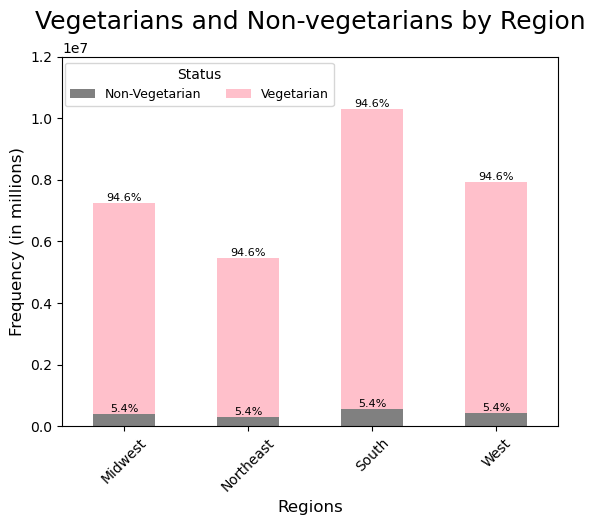

In [82]:
# Plotting the stacked bar

bar_region_veg = ct_veg.plot(kind = 'bar', stacked = True, color =['gray', 'pink'])
bar_region_veg.legend(title='Status', bbox_to_anchor=(0.56, 1.0), loc='upper right', ncol = 2, labels=['Non-Vegetarian', 'Vegetarian'], fontsize = 9)
plt.title('Vegetarians and Non-vegetarians by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the stacked bar chart

# Get the total for each row
total = ct_veg.sum(axis=1)

# Calculate the percent for each row
per = ct_veg.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_region_veg.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c, per[(label)])]
    
    # Add the annotation
    bar_region_veg.bar_label(c, labels=labels, label_type='edge', fontsize = 8)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 12000000)


In [83]:
# Exporting 
bar_region_veg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_veg_03.17.png'), bbox_inches='tight')

In [84]:
# Creating order_time_habit and region connection
ct_habit = pd.crosstab(df['region'], df['cust_ords_habit'], dropna = False)

In [85]:
ct_habit

cust_ords_habit,Early bird,Night owl,Stardard hours
region,,,
Midwest,285815,2250470,4725228
Northeast,222249,1682688,3559748
South,414122,3190331,6706686
West,310712,2427321,5189194


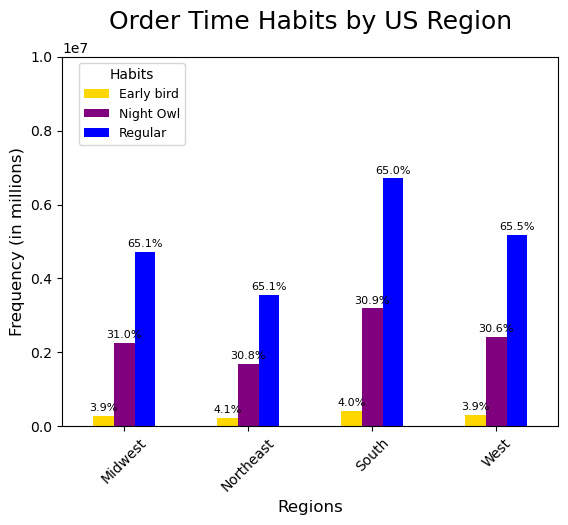

In [86]:
# Plotting the stacked bar

bar_hbt_rgn = ct_habit.plot(kind = 'bar', stacked = False, color =['gold', 'purple','blue'])
bar_hbt_rgn.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Order Time Habits by US Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the bar chart

# Get the total for each row
total = ct_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_hbt_rgn.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_hbt_rgn.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)


In [87]:
# Exporting order_time_habits (in the US regions) bar chart in .png format
bar_hbt_rgn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_rgn_03.17.png'), bbox_inches='tight')

In [88]:
ct_hbt_dept = pd.crosstab(df['department'], df['cust_ords_habit'], dropna = False)
ct_hbt_dept

cust_ords_habit,Early bird,Night owl,Stardard hours
department,,,
alcohol,3083,38399,103145
babies,16112,140367,253913
bakery,42578,345898,732352
beverages,98942,766835,1706124
breakfast,26296,211140,433414
bulk,1385,10309,21757
canned goods,40076,301449,670549
dairy eggs,202570,1614387,3360225
deli,38926,308324,656584


(-1.0, 22.0)

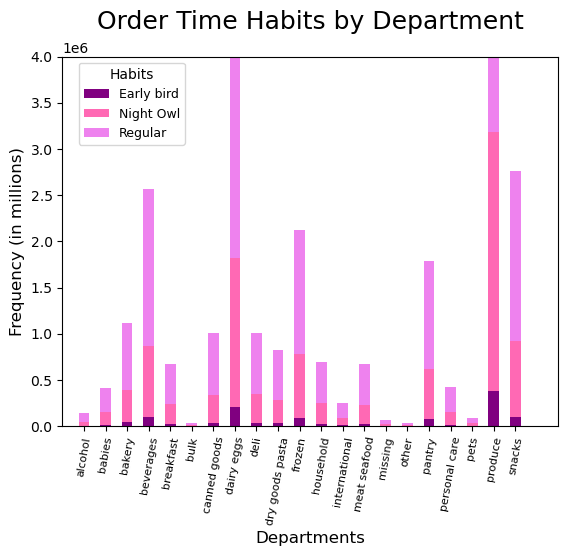

In [89]:
# Plotting the stacked bar
bar_hbt_dept = ct_hbt_dept.plot(kind = 'bar', stacked = True, color =['purple','hotpink','violet'])
bar_hbt_dept.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Order Time Habits by Department', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Set the y axis limit to increase the axis length
plt.ylim(0, 4000000)
plt.xlim(-1, 22)

In [90]:
bar_hbt_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_dept_03.17.png'), bbox_inches='tight')

In [91]:
df.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,region,activity_flag,income_category,cust_ords_habit,price_range,department,age_category,household,Has_babies,vegetarian
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,South,High-activity,Low,Night owl,Mid-range product,beverages,Youth,Couple With Children,No,Yes
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,South,High-activity,Low,Night owl,Mid-range product,beverages,Youth,Couple With Children,No,Yes
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,South,High-activity,Low,Stardard hours,Mid-range product,beverages,Youth,Couple With Children,No,Yes
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,South,High-activity,Low,Night owl,Mid-range product,beverages,Youth,Couple With Children,No,Yes
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,South,High-activity,Low,Stardard hours,Mid-range product,beverages,Youth,Couple With Children,No,Yes


In [92]:
# Export update df.pkl format 
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers_udpate.pkl'))

In [93]:
# Import final data set
df_add_chart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_final_report.pkl'))

Text(0.5, 1.0, 'Instacart Shopping Time of Day by Type of Shopper')

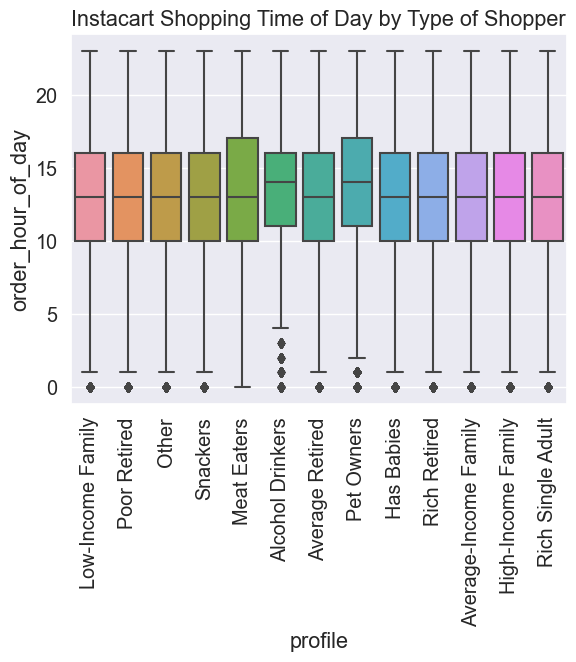

In [94]:
sns.set(font_scale=1.3)
boxplot_profile_time = sns.boxplot(x='profile',
                y='order_hour_of_day',
                data=df_add_chart)
plt.xticks(rotation=90)
plt.title ('Instacart Shopping Time of Day by Type of Shopper')

In [95]:
boxplot_profile_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_profile_time_03.17.png'), bbox_inches='tight')

In [101]:
df_Rfinal = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ic_final_report.pkl'))

In [102]:
df_Rfinal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_order_habit,income_category,family_size,household,department,alcohol_drinker,has_babies,profile,pet_owner,vegetarian
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Night owl,Low,Large,Couple With Children,beverages,No,No,Low-Income Family,No,Yes
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Night owl,Low,Large,Couple With Children,beverages,No,No,Low-Income Family,No,Yes
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Stardard hours,Low,Large,Couple With Children,beverages,No,No,Low-Income Family,No,Yes
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Night owl,Low,Large,Couple With Children,beverages,No,No,Low-Income Family,No,Yes
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Stardard hours,Low,Large,Couple With Children,beverages,No,No,Low-Income Family,No,Yes


In [112]:
print(df_Rfinal['loyalty_flag'])

0               New customer
1               New customer
2               New customer
3               New customer
4               New customer
                  ...       
32404850    Regular customer
32404851    Regular customer
32404852    Regular customer
32404853    Regular customer
32404854    Regular customer
Name: loyalty_flag, Length: 30964564, dtype: object


In [134]:
# age_category & order day of week
crosstab_age_dow = pd.crosstab(df_Rfinal['age_category'], df_Rfinal['orders_day_of_week'], dropna = False)

Text(0.5, 1.0, 'Purchases in days of week by Age')

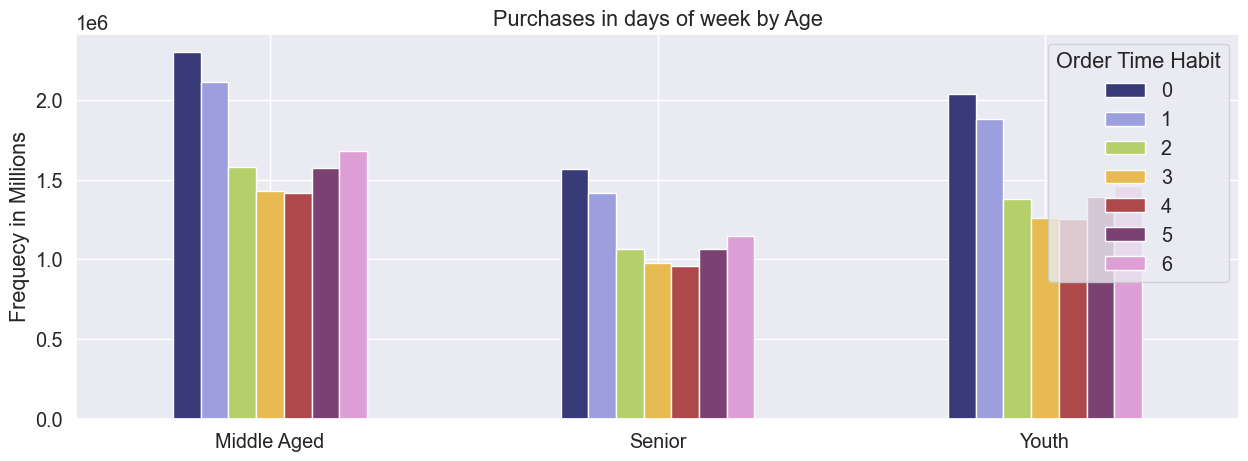

In [136]:
# Create barchart from crosstab
bar_age_dow = crosstab_age_dow.plot.bar(rot=0, figsize=(15,5), colormap='tab20b').legend(title='Order Time Habit')
plt.xlabel('')
plt.ylabel('Frequecy in Millions')
plt.title ('Purchases in days of week by Age')

In [132]:
# age_category & order day of week
crosstab_age_habit = pd.crosstab(df_Rfinal['age_category'], df_Rfinal['customer_order_habit'], dropna = False)

Text(0.5, 1.0, 'Frequency of hour purchased during the day')

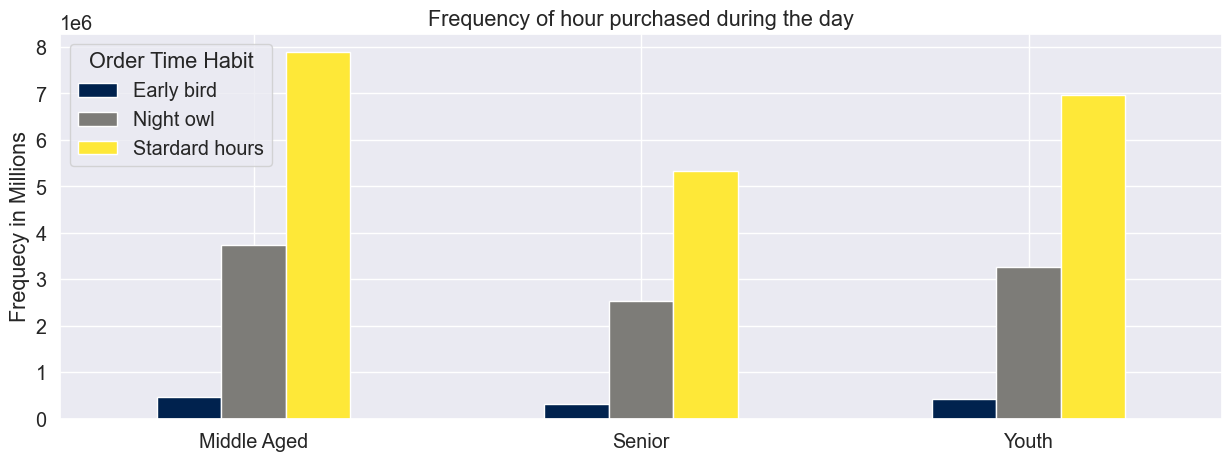

In [133]:
# Create barchart from crosstab
bar_age_category = crosstab_age_habit.plot.bar(rot=0, figsize=(15,5), colormap='cividis').legend(title='Order Time Habit')
plt.xlabel('')
plt.ylabel('Frequecy in Millions')
plt.title ('Frequency of hour purchased during the day')

In [119]:
df_Rfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 43 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  average_price           float64
 20  spending_flag           object 
 21  median_prior_orders     float

Text(0.5, 0, 'Loyalty Customer')

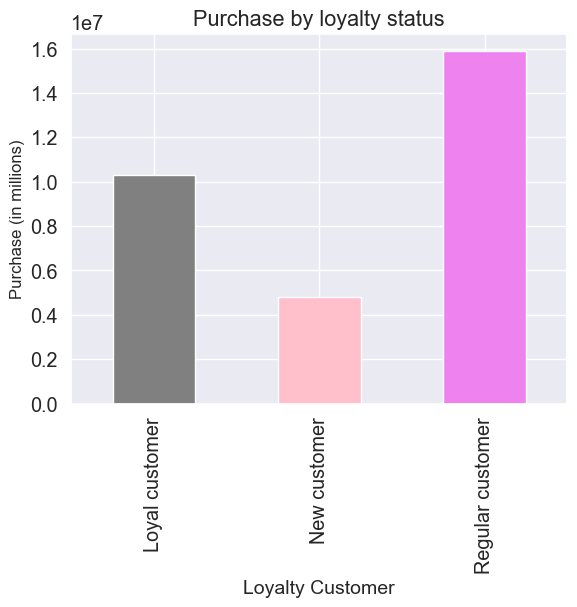

In [143]:
#change colors
barchart_loyalty_customers = df_Rfinal['loyalty_flag'].value_counts().sort_index().plot.bar(color =['gray','pink', 'violet'])
plt.title ('Purchase by loyalty status')
plt.ylabel('Purchase (in millions)', fontsize = 12)
plt.xlabel('Loyalty Customer',  fontsize = 14)

In [137]:
#comparing different profiles by region
crosstab_cust_region = pd.crosstab(df_Rfinal['profile'], df_Rfinal['region'], normalize = 'index')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Alcohol Drinkers'),
  Text(1, 0, 'Average Retired'),
  Text(2, 0, 'Average-Income Family'),
  Text(3, 0, 'Has Babies'),
  Text(4, 0, 'High-Income Family'),
  Text(5, 0, 'Low-Income Family'),
  Text(6, 0, 'Meat Eaters'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Pet Owners'),
  Text(9, 0, 'Poor Retired'),
  Text(10, 0, 'Rich Retired'),
  Text(11, 0, 'Rich Single Adult'),
  Text(12, 0, 'Snackers')])

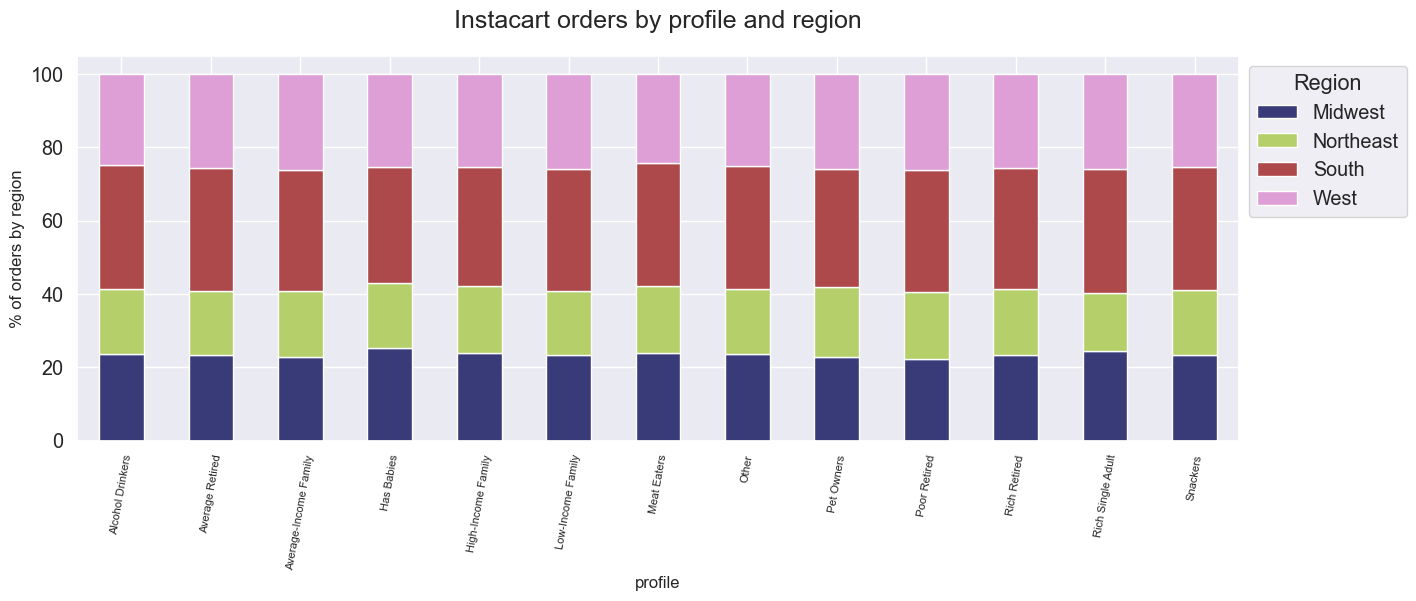

In [141]:
# Creating stacked bar graph to plot profile for regions
bar_profile_region = crosstab_cust_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(15,5), colormap='tab20b').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("profile", fontsize = 12)
plt.ylabel("% of orders by region" , fontsize = 12)
plt.title ("Instacart orders by profile and region", fontsize = 18, pad=20)
plt.xticks(rotation=80, fontsize = 8)